In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [7]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns


In [8]:
df_train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
print('Tamanho: ',df_train.shape)
df_train.head()

Tamanho:  (8693, 14)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [9]:
df_train.describe()


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [11]:
df_train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [13]:
df_train[df_train.isna().any(axis=1)].isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Count'>

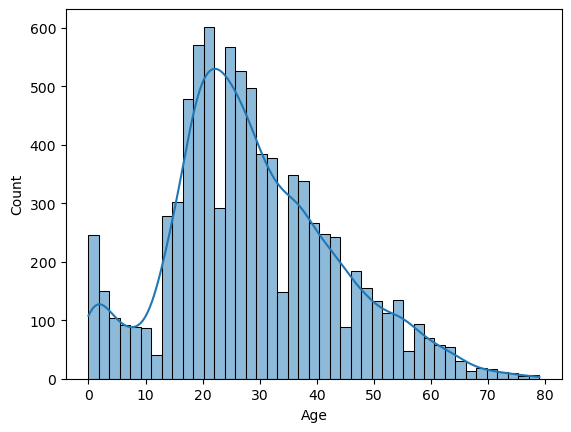

In [14]:
sns.histplot(data=df_train,x='Age', kde=True)

In [16]:
display(df_train[["Transported","HomePlanet", 'Age']].groupby(by=["Transported","HomePlanet"]).median().reset_index())

,Transported,HomePlanet,Age
0,False,Earth,24.0
1,False,Europa,35.0
2,False,Mars,30.0
3,True,Earth,22.0
4,True,Europa,31.0
5,True,Mars,26.0


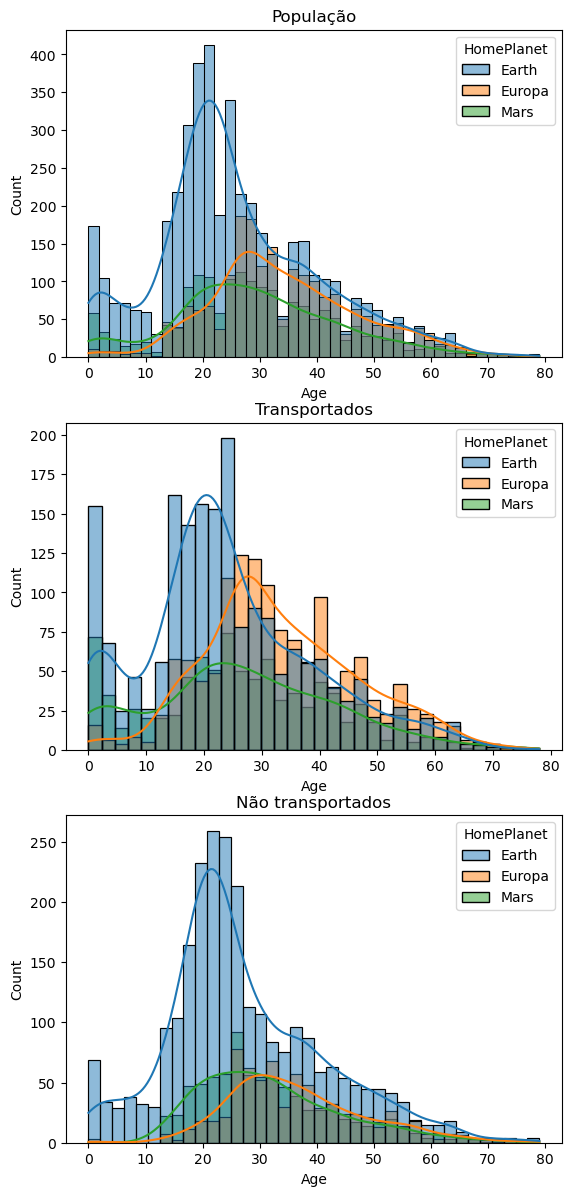

In [17]:
fig, axes = plt.subplots(nrows=3, ncols=1)
sns.histplot(data=df_train,x='Age', kde=True,hue="HomePlanet",ax=axes[0],hue_order=["Earth",'Europa','Mars']).set_title('População')
sns.histplot(data=df_train[df_train['Transported'] == True],x='Age', kde=True,hue="HomePlanet",ax=axes[1],hue_order=["Earth",'Europa','Mars']).set_title('Transportados')
sns.histplot(data=df_train[df_train['Transported'] == False],x='Age', kde=True,hue="HomePlanet",ax=axes[2],hue_order=["Earth",'Europa','Mars']).set_title('Não transportados')

plt.subplots_adjust(top=1.7)
fig.set_figheight(7)